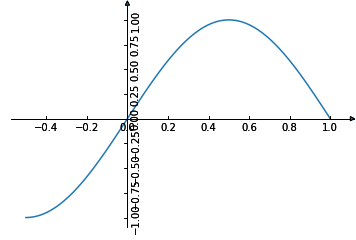

In [1]:
#Axis Artist

#This example shows some configurations for axis style.


from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np

if 1:
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)

    x = np.linspace(-0.5, 1., 100)
    ax.plot(x, np.sin(x*np.pi))

    plt.show()

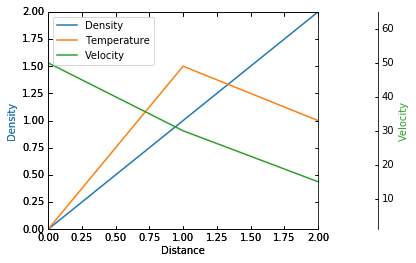

In [2]:
#Demo Parasite Axes2


from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right",
                                    axes=par2,
                                    offset=(offset, 0))

par2.axis["right"].toggle(all=True)

host.set_xlim(0, 2)
host.set_ylim(0, 2)

host.set_xlabel("Distance")
host.set_ylabel("Density")
par1.set_ylabel("Temperature")
par2.set_ylabel("Velocity")

p1, = host.plot([0, 1, 2], [0, 1, 2], label="Density")
p2, = par1.plot([0, 1, 2], [0, 3, 2], label="Temperature")
p3, = par2.plot([0, 1, 2], [50, 30, 15], label="Velocity")

par1.set_ylim(0, 4)
par2.set_ylim(1, 65)

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())

plt.draw()
plt.show()

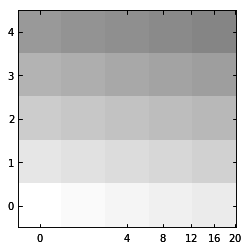

In [3]:
#Demo Curvelinear Grid2

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear
from mpl_toolkits.axisartist.axislines import Subplot

import mpl_toolkits.axisartist.angle_helper as angle_helper


def curvelinear_test1(fig):
    """
    grid for custom transform.
    """

    def tr(x, y):
        sgn = np.sign(x)
        x, y = np.abs(np.asarray(x)), np.asarray(y)
        return sgn*x**.5, y

    def inv_tr(x, y):
        sgn = np.sign(x)
        x, y = np.asarray(x), np.asarray(y)
        return sgn*x**2, y

    extreme_finder = angle_helper.ExtremeFinderCycle(20, 20,
                                                     lon_cycle=None,
                                                     lat_cycle=None,
                                                     # (0, np.inf),
                                                     lon_minmax=None,
                                                     lat_minmax=None,
                                                     )

    grid_helper = GridHelperCurveLinear((tr, inv_tr),
                                        extreme_finder=extreme_finder)

    ax1 = Subplot(fig, 111, grid_helper=grid_helper)
    # ax1 will have a ticks and gridlines defined by the given
    # transform (+ transData of the Axes). Note that the transform of
    # the Axes itself (i.e., transData) is not affected by the given
    # transform.

    fig.add_subplot(ax1)

    ax1.imshow(np.arange(25).reshape(5, 5),
               vmax=50, cmap=plt.cm.gray_r,
               interpolation="nearest",
               origin="lower")

    # tick density
    grid_helper.grid_finder.grid_locator1._nbins = 6
    grid_helper.grid_finder.grid_locator2._nbins = 6


if 1:
    fig = plt.figure(1, figsize=(7, 4))
    fig.clf()

    curvelinear_test1(fig)
    plt.show()

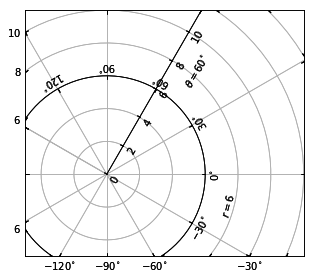

In [4]:
#Demo Floating Axis

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D
from mpl_toolkits.axisartist import SubplotHost
from mpl_toolkits.axisartist import GridHelperCurveLinear


def curvelinear_test2(fig):
    """
    polar projection, but in a rectangular box.
    """
    global ax1
    # see demo_curvelinear_grid.py for details
    tr = Affine2D().scale(np.pi / 180., 1.) + PolarAxes.PolarTransform()

    extreme_finder = angle_helper.ExtremeFinderCycle(20,
                                                     20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0,
                                                                 np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)

    tick_formatter1 = angle_helper.FormatterDMS()

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 1, 1, grid_helper=grid_helper)

    fig.add_subplot(ax1)

    # Now creates floating axis

    # floating axis whose first coordinate (theta) is fixed at 60
    ax1.axis["lat"] = axis = ax1.new_floating_axis(0, 60)
    axis.label.set_text(r"$\theta = 60^{\circ}$")
    axis.label.set_visible(True)

    # floating axis whose second coordinate (r) is fixed at 6
    ax1.axis["lon"] = axis = ax1.new_floating_axis(1, 6)
    axis.label.set_text(r"$r = 6$")

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True)

fig = plt.figure(1, figsize=(5, 5))
fig.clf()

curvelinear_test2(fig)

plt.show()

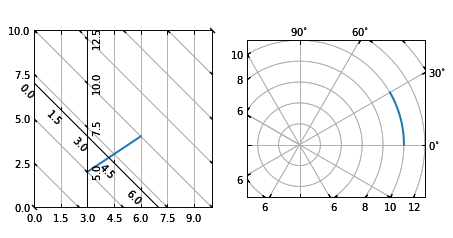

In [5]:
#Demo Curvelinear Grid

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

from mpl_toolkits.axisartist import Subplot
from mpl_toolkits.axisartist import SubplotHost, \
    ParasiteAxesAuxTrans
from mpl_toolkits.axisartist.grid_helper_curvelinear import \
    GridHelperCurveLinear


def curvelinear_test1(fig):
    """
    grid for custom transform.
    """

    def tr(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y - x

    def inv_tr(x, y):
        x, y = np.asarray(x), np.asarray(y)
        return x, y + x

    grid_helper = GridHelperCurveLinear((tr, inv_tr))

    ax1 = Subplot(fig, 1, 2, 1, grid_helper=grid_helper)
    # ax1 will have a ticks and gridlines defined by the given
    # transform (+ transData of the Axes). Note that the transform of
    # the Axes itself (i.e., transData) is not affected by the given
    # transform.

    fig.add_subplot(ax1)

    xx, yy = tr([3, 6], [5.0, 10.])
    ax1.plot(xx, yy, linewidth=2.0)

    ax1.set_aspect(1.)
    ax1.set_xlim(0, 10.)
    ax1.set_ylim(0, 10.)

    ax1.axis["t"] = ax1.new_floating_axis(0, 3.)
    ax1.axis["t2"] = ax1.new_floating_axis(1, 7.)
    ax1.grid(True, zorder=0)


import mpl_toolkits.axisartist.angle_helper as angle_helper

from matplotlib.projections import PolarAxes
from matplotlib.transforms import Affine2D


def curvelinear_test2(fig):
    """
    polar projection, but in a rectangular box.
    """

    # PolarAxes.PolarTransform takes radian. However, we want our coordinate
    # system in degree
    tr = Affine2D().scale(np.pi/180., 1.) + PolarAxes.PolarTransform()

    # polar projection, which involves cycle, and also has limits in
    # its coordinates, needs a special method to find the extremes
    # (min, max of the coordinate within the view).

    # 20, 20 : number of sampling points along x, y direction
    extreme_finder = angle_helper.ExtremeFinderCycle(20, 20,
                                                     lon_cycle=360,
                                                     lat_cycle=None,
                                                     lon_minmax=None,
                                                     lat_minmax=(0, np.inf),
                                                     )

    grid_locator1 = angle_helper.LocatorDMS(12)
    # Find a grid values appropriate for the coordinate (degree,
    # minute, second).

    tick_formatter1 = angle_helper.FormatterDMS()
    # And also uses an appropriate formatter.  Note that,the
    # acceptable Locator and Formatter class is a bit different than
    # that of mpl's, and you cannot directly use mpl's Locator and
    # Formatter here (but may be possible in the future).

    grid_helper = GridHelperCurveLinear(tr,
                                        extreme_finder=extreme_finder,
                                        grid_locator1=grid_locator1,
                                        tick_formatter1=tick_formatter1
                                        )

    ax1 = SubplotHost(fig, 1, 2, 2, grid_helper=grid_helper)

    # make ticklabels of right and top axis visible.
    ax1.axis["right"].major_ticklabels.set_visible(True)
    ax1.axis["top"].major_ticklabels.set_visible(True)

    # let right axis shows ticklabels for 1st coordinate (angle)
    ax1.axis["right"].get_helper().nth_coord_ticks = 0
    # let bottom axis shows ticklabels for 2nd coordinate (radius)
    ax1.axis["bottom"].get_helper().nth_coord_ticks = 1

    fig.add_subplot(ax1)

    # A parasite axes with given transform
    ax2 = ParasiteAxesAuxTrans(ax1, tr, "equal")
    # note that ax2.transData == tr + ax1.transData
    # Anything you draw in ax2 will match the ticks and grids of ax1.
    ax1.parasites.append(ax2)
    intp = cbook.simple_linear_interpolation
    ax2.plot(intp(np.array([0, 30]), 50),
             intp(np.array([10., 10.]), 50),
             linewidth=2.0)

    ax1.set_aspect(1.)
    ax1.set_xlim(-5, 12)
    ax1.set_ylim(-5, 10)

    ax1.grid(True, zorder=0)

if 1:
    fig = plt.figure(1, figsize=(7, 4))
    fig.clf()

    curvelinear_test1(fig)
    curvelinear_test2(fig)

    plt.draw()
    plt.show()

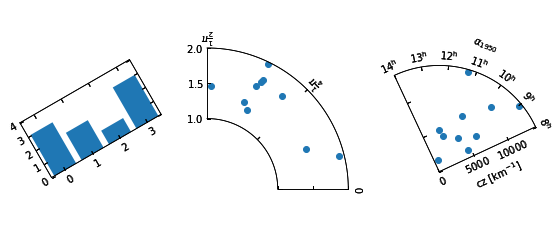

In [6]:
#Demo Floating Axes


from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import numpy as np
import mpl_toolkits.axisartist.angle_helper as angle_helper
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)


def setup_axes1(fig, rect):
    """
    A simple one.
    """
    tr = Affine2D().scale(2, 1).rotate_deg(30)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    aux_ax = ax1.get_aux_axes(tr)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    return ax1, aux_ax


def setup_axes2(fig, rect):
    """
    With custom locator and formatter.
    Note that the extreme values are swapped.
    """
    tr = PolarAxes.PolarTransform()

    pi = np.pi
    angle_ticks = [(0, r"$0$"),
                   (.25*pi, r"$\frac{1}{4}\pi$"),
                   (.5*pi, r"$\frac{1}{2}\pi$")]
    grid_locator1 = FixedLocator([v for v, s in angle_ticks])
    tick_formatter1 = DictFormatter(dict(angle_ticks))

    grid_locator2 = MaxNLocator(2)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(.5*pi, 0, 2, 1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax


def setup_axes3(fig, rect):
    """
    Sometimes, things like axis_direction need to be adjusted.
    """

    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-95, 0)

    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180., 1.)

    tr = tr_rotate + tr_scale + PolarAxes.PolarTransform()

    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()

    grid_locator2 = MaxNLocator(3)

    # Specify theta limits in degrees
    ra0, ra1 = 8.*15, 14.*15
    # Specify radial limits
    cz0, cz1 = 0, 14000
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(ra0, ra1, cz0, cz1),
        grid_locator1=grid_locator1,
        grid_locator2=grid_locator2,
        tick_formatter1=tick_formatter1,
        tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)

    # adjust axis
    ax1.axis["left"].set_axis_direction("bottom")
    ax1.axis["right"].set_axis_direction("top")

    ax1.axis["bottom"].set_visible(False)
    ax1.axis["top"].set_axis_direction("bottom")
    ax1.axis["top"].toggle(ticklabels=True, label=True)
    ax1.axis["top"].major_ticklabels.set_axis_direction("top")
    ax1.axis["top"].label.set_axis_direction("top")

    ax1.axis["left"].label.set_text(r"cz [km$^{-1}$]")
    ax1.axis["top"].label.set_text(r"$\alpha_{1950}$")

    # create a parasite axes whose transData in RA, cz
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  # for aux_ax to have a clip path as in ax
    ax1.patch.zorder = 0.9  # but this has a side effect that the patch is
    # drawn twice, and possibly over some other
    # artists. So, we decrease the zorder a bit to
    # prevent this.

    return ax1, aux_ax
fig = plt.figure(1, figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

ax1, aux_ax1 = setup_axes1(fig, 131)
aux_ax1.bar([0, 1, 2, 3], [3, 2, 1, 3])

ax2, aux_ax2 = setup_axes2(fig, 132)
theta = np.random.rand(10)*.5*np.pi
radius = np.random.rand(10) + 1.
aux_ax2.scatter(theta, radius)

ax3, aux_ax3 = setup_axes3(fig, 133)

theta = (8 + np.random.rand(10)*(14 - 8))*15.  # in degrees
radius = np.random.rand(10)*14000.
aux_ax3.scatter(theta, radius)

plt.show()